<a href="https://colab.research.google.com/github/aimazin/Cost_South_African_Variant_to_UK/blob/main/banksafestay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge

In [ ]:
df = pd.read_csv('/content/SIVBQ.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-05-04,302.130005,309.230011,297.959991,305.820007,305.820007,508955
1,2018-05-07,306.000000,309.480011,303.100006,307.320007,307.320007,363839
2,2018-05-08,306.510010,313.929993,306.510010,312.730011,312.730011,538230
3,2018-05-09,313.440002,318.709991,310.440002,317.119995,317.119995,387706
4,2018-05-10,317.839996,323.700012,315.839996,320.279999,320.279999,401818


In [ ]:
df = df[['Date','Volume','Close']]
df.head()

,Date,Volume,Close
0,2018-05-04,508955,305.820007
1,2018-05-07,363839,307.320007
2,2018-05-08,538230,312.730011
3,2018-05-09,387706,317.119995
4,2018-05-10,401818,320.279999


In [ ]:
vol = df.Volume/ np.max(df.Volume)

In [ ]:
c9 = df.Close.rolling(9).mean()
c26 = df.Close.rolling(26).mean()
v9 = vol.rolling(9).mean()
v26 = vol.rolling(26).mean()
cr = np.sqrt(c9/c26) / np.sqrt(np.max(c9/c26))
vr = np.sqrt(v9/v26) / np.sqrt(np.max(v9/v26))


In [ ]:

t=(pd.DataFrame([c9,c26,cr,v9,v26,vr])).T 
t.columns=['c9','c26','cr','v9','v26','vr']
t.tail()
df1 = df.join(t)
df1.dropna(inplace=True,axis=0)
df1.isna()


,Date,Volume,Close,c9,c26,cr,v9,v26,vr
25,False,False,False,False,False,False,False,False,False
26,False,False,False,False,False,False,False,False,False
27,False,False,False,False,False,False,False,False,False
28,False,False,False,False,False,False,False,False,False
29,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
1253,False,False,False,False,False,False,False,False,False
1254,False,False,False,False,False,False,False,False,False
1255,False,False,False,False,False,False,False,False,False
1256,False,False,False,False,False,False,False,False,False


(array([1.300e+01, 3.000e+00, 2.000e+00, 1.000e+00, 1.000e+00, 3.000e+00,
        9.000e+00, 1.000e+01, 1.730e+02, 1.018e+03]),
 array([0.08684545, 0.17816091, 0.26947636, 0.36079182, 0.45210727,
        0.54342273, 0.63473818, 0.72605364, 0.81736909, 0.90868455,
        1.        ]),
 <BarContainer object of 10 artists>)

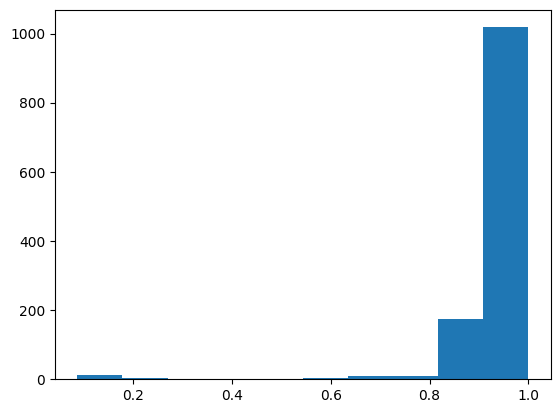

In [ ]:
plt.hist(cr)

(array([  4.,   0.,   2.,  10.,   9., 469., 537., 173.,  12.,  17.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

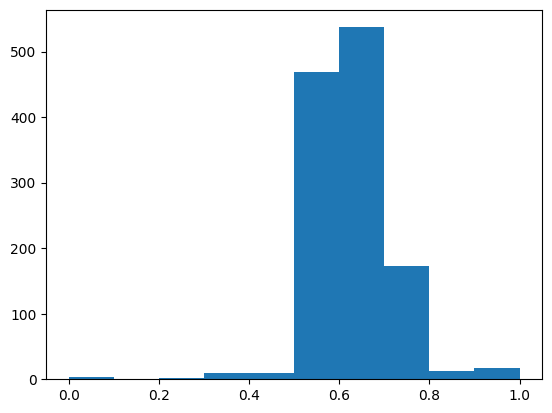

In [ ]:
plt.hist(vr)

In [ ]:
cr01 = np.where(cr< .9 , 1,0)
vr01 = np.where(vr< .5, 1,0)

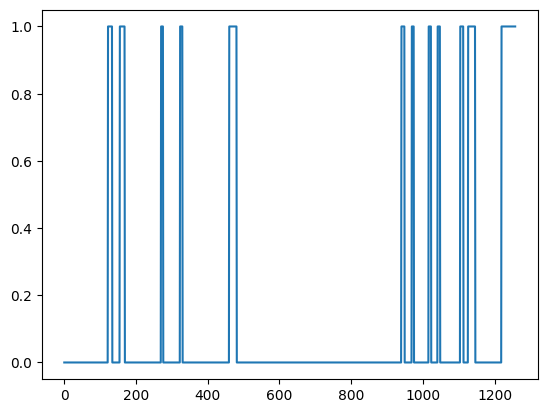

In [ ]:
plt.plot(range(len(cr01)),cr01)

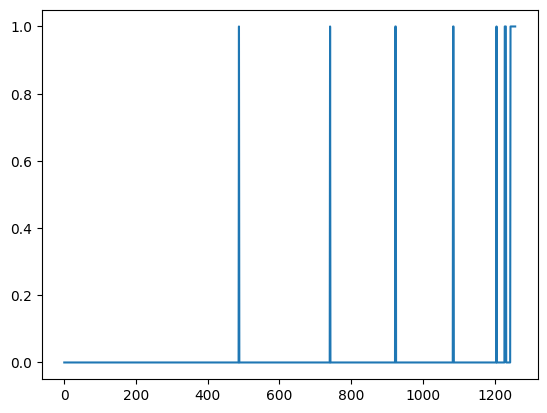

In [ ]:
plt.plot(range(len(vr01)),vr01)

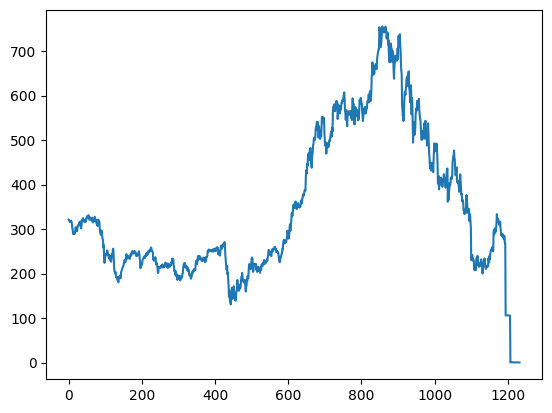

In [ ]:
plt.plot(range(len(df1.Close)),df1.Close)

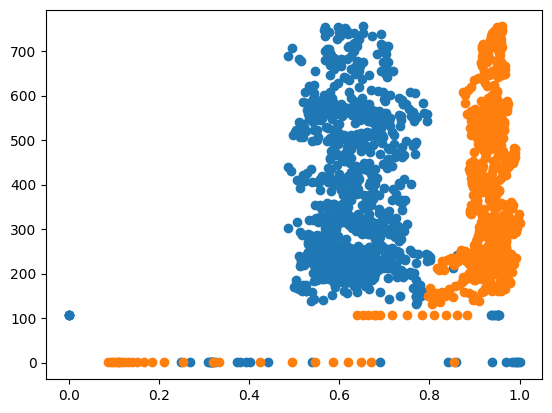

In [ ]:
plt.scatter(df1.vr,df1.Close)
plt.scatter(df1.cr,df1.Close)

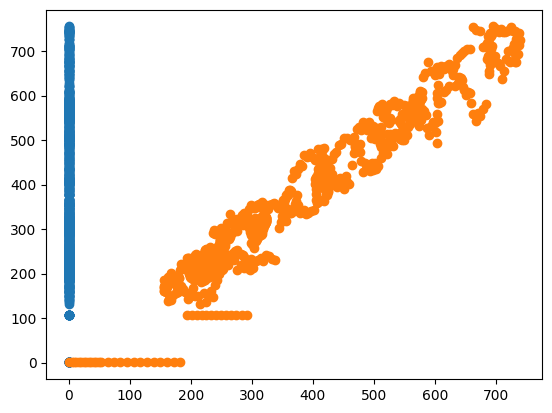

In [ ]:
plt.scatter(df1.v26,df1.Close)
plt.scatter(df1.c26,df1.Close)

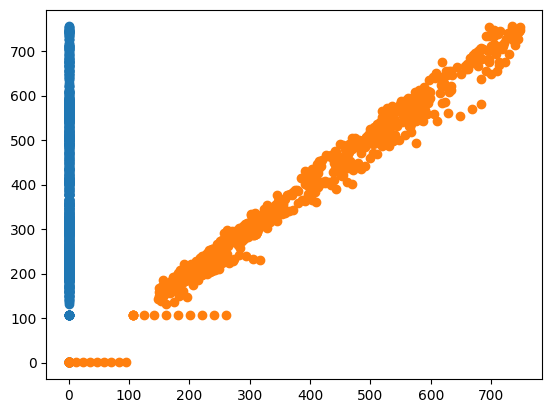

In [ ]:
plt.scatter(df1.v9,df1.Close)
plt.scatter(df1.c9,df1.Close)

In [ ]:
df1.columns

Index(['Date', 'Volume', 'Close', 'c9', 'c26', 'cr', 'v9', 'v26', 'vr'], dtype='object')

In [ ]:
sc = scale
Xtr, Xte, ytr, yte = train_test_split(df1.drop(['Date','Close'],axis=1),df1.Close, train_size=.8,random_state=2023)
Xtr = sc(Xtr)
Xte = sc(Xte)

In [ ]:
print(Xtr.shape,Xte.shape)

(246, 7) (987, 7)


In [ ]:
r = Ridge()
pred = r.fit(Xtr,ytr).predict(Xte)


In [ ]:
pred.shape

(247,)

In [ ]:
yte.shape

(247,)

In [ ]:
r.score(Xte,yte)

0.9638326833776368

In [ ]:
pd.DataFrame(np.array([(['c9', 'c26', 'cr', 'v9', 'v26', 'vr','coefC']),r.coef_]))

,0,1,2,3,4,5,6
0,c9,c26,cr,v9,v26,vr,coefC
1,-4.778667766631938,184.123168640449,-14.745781690915925,3.22591559510089,3.710864956830027,-0.09079072425872511,-6.567342975548871


### it took two days for the bank to pick up the problem so lets analyse the two day cumulated sum of the Stock Close

In [ ]:
d = df.Close.rolling(2).sum()[-len(df1.Close):]
Xtr, Xte, ytr, yte = train_test_split(df1.drop(['Date','Close'],axis=1),d, train_size=.8,random_state=2023)
Xtr = sc(Xtr)
Xte = sc(Xte)

In [ ]:
r = Ridge()
pred = r.fit(Xtr,ytr).predict(Xte)


In [ ]:
r.score(Xte,yte)

0.9663560615534997

In [ ]:
pd.DataFrame(np.array([(['c9', 'c26', 'cr', 'v9', 'v26', 'vr','coefC']),r.coef_]))

,0,1,2,3,4,5,6
0,c9,c26,cr,v9,v26,vr,coefC
1,-6.678461286069613,371.39678627349815,-32.2915633398288,5.029783704792601,5.607857773718246,-0.6400573679645563,-11.94480557036472


### all things being even the comparing just the y-intercepts we get a doubling in break even with it a doubling upon that.